# DSA 5105 - Homework 1

## Description

As the first homework of this course, you will apply the knowledge you have learned in the first two lectures on `linear models` and simple extensions using `kernel` methods on some datasets. This is also a chance to learn to use `jupyter notebook` and basic `sklearn` functionalities. A basic introduction to installing and using `jupyter notebooks` is found [here](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook). You are strongly encouraged to use python 3 instead of python 2


The goals of this homework are
  * Learn basic data processing and machine learning using python
  * Reinforce knowledge on linear models and kernel methods
  * Prepare for the project in this course
  
Whenever you are stuck, you are encouraged to look at the jupyter notebook demonstration for the first lecture for some guidance. You should also learn to look at documentation of online libraries. For example, if you want to perform *kernel ridge regression* using `sklearn`, a quick google will land you on [this page](https://scikit-learn.org/stable/modules/kernel_ridge.html), where extensive description and examples are given.

## Instructions

Please complete each question below directly in this notebook. Note that you can write in the cells to describe what you are doing and any issues you face. If you are familiar, you can also format it using `markdown` as it is supported by `jupyter`. 

The grade given is based on the following
  1. Scientific correctness of your approach
  2. Clear documentation of your approach

## Dataset

We will work on a standard regression dataset on predicting concrete compressive strength from various composition and processing properties. 

We will download the dataset directly from the [UCI repository](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength) using `urllib`. Running it requires an internet connection. Otherwise, you can also download the `Concrete_Data.xls` directly from the link above and place into the root folder relative to this notebook. 

Reading the Excel file requires the `xlrd` library on top of `pandas`. If you see an error due to not having xlrd, install it via
```
$pip install xlrd
```

In general, if you see an error 
```
ModuleNotFoundError: No module named 'some_module'
```
just install it
```
$pip install some_module
```

In [1]:
import pandas as pd
import urllib.request

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'
urllib.request.urlretrieve(url, './Concrete_Data.xls')
data = pd.read_excel('./Concrete_Data.xls')

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
len(data.columns)

9

- There are 8 features and 1 target
    - cement, ..., age are features
    - concrete compressive strength is target we want to predict

## Question 1 (2 points)

In this homework we are going to predict the last column values (Concrete compressive strength) from design variables in the other columns. Choose 3 input properties and visualize each of their effects on the compressive strength. Plot your findings below. You may find the `seaborn` library examples in lecture 1 useful.

## Question 2 (4 points)

Perform linear regression using all the input variables on this dataset to predict the compressive strength. Carefully evaluate your regression model using appropriate metrics and datasets. 

## Question 3 (4 points)

Now, instead of linear regression, apply kernel ridge regression (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)) with 3 kernels:
1. linear kernel
2. polynomial kernel with degree 3
3. rbf kernel

Quantify the performance improvement (if any) with respect to the linear case, and also the other kernels. What do you observe? Which would you choose?

*Hint: For the RBF kernel, should you do something to the inputs first? Why?*

---

Note: we have not gone through cross validation and hyper-parameter tuning yet, so you are not expected to do this here -- although you are free to do it if you know how. 

---
***

# Main function

## Question 1:

- choose 3 inputs and do the visualization


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython import display

In [6]:
display.set_matplotlib_formats('svg')
# choose 3 features, visualize their contribution to target in 3-D graph
def visualize3D(data, visualize_inputs_idx):
    # load the feature names that need to be visualized
    visualize_inputs = [data.columns[idx] for idx in visualize_inputs_idx]
    # load the target name, which treats as the size of data point
    target_attribute = data.columns[-1] 

    sns.set(style = "darkgrid")
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection = '3d')

    x, y, z = data[visualize_inputs[0]], data[visualize_inputs[1]], data[visualize_inputs[2]]
    size = data[target_attribute]

    ax.scatter3D(x, y, z, s = size, alpha = 0.5, c = 'purple')
    
    # select the first word of each feature
    ax.set_xlabel(visualize_inputs[0].split('(')[0])
    ax.set_ylabel(visualize_inputs[1].split('(')[0])
    ax.set_zlabel(visualize_inputs[2].split('(')[0])
    ax.set_title('Feature Visualization')
    ax.grid(True)

    plt.show()

def visualize2D(data, visualize_inputs_idx):
    fig, ax = plt.subplots(1, 3, figsize=(18, 9))
    
    # load the feature name
    visualize_inputs = [data.columns[idx] for idx in visualize_inputs_idx]
    # load the target name
    target_attribute = data.columns[-1]
    
    for i in range(3):
        sns.scatterplot(
        x = visualize_inputs[i],
        y = target_attribute,
        data = data,
        ax = ax[i]
        )

### choose 'cement', 'water', 'superplasticizer' features to do the visualization

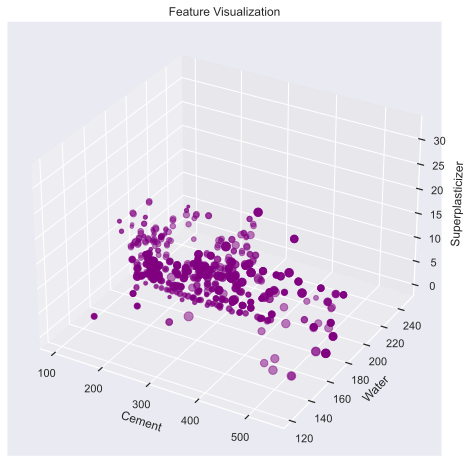

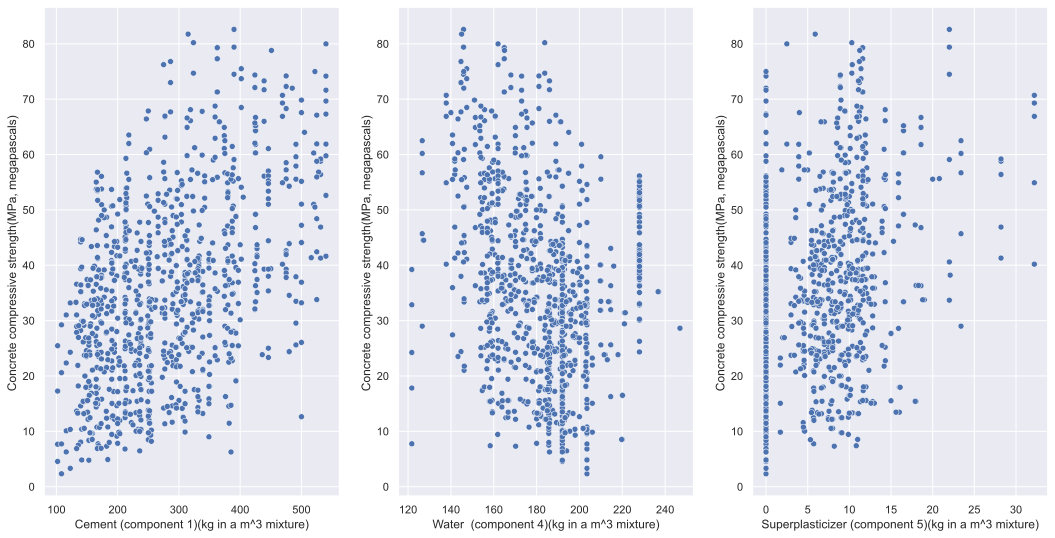

In [7]:
visualize_inputs_idx = [0, 3, 4]
visualize3D(data, visualize_inputs_idx)
visualize2D(data, visualize_inputs_idx)

### observation:
- Firstly, we choose **'cement'**, **'water'**, **'superplasticizer'** vs **'concrete compressive strength' (target)** to achieve the visualization;
- In 2D visualization, 
    - As for 'cement', there exists **relatively linear relationship** between it and target. It is obvious from the graph that, **large value of cement will lead to large value of target (positive corelated)**
    - As for 'water' and 'superplasticizer', there seems to be **no linear relationship**. But we can still reckon that there exists some **non-linear relationship** between them and target. For instance, from 'water' graph, we can say that, approximately, **large value of water will lead to small value of target (negative corelated)**. Moreover, from 'superplasticizer' graph, we can deduce that **large value of superplasticizer will lead to large value of target (positive corelated)**.
    - This may indicate that, the linear model is not very suitable for this question.
        - We'd better enlarge the hypothesis space, which require us to try **feature map methods** to **increase the complexity of our model** so that we can **capture the non-linear relation** between inputs and outputs.
- In 3D visualization,
    - Here, we use **size of point** to model the value of target.
    - It can be observed from the visualzation that, **large-size point approximately forms a cluster in the center of the graph** and **size of point shrinks with the increase of 'water'**. This seems to indicate that, **there somehow exists kind of relationship between features and target**, but not necessarily linear relation.

---

## Question 2:
- linear regression;
- evaluation;

In [8]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# 20% testing set, 80% training set
train_data, test_data = train_test_split(data, test_size=0.2)

In [11]:
# split the features and target
X_train, y_train = train_data[train_data.columns[:-1]], train_data[train_data.columns[-1]] 
X_test, y_test = test_data[test_data.columns[:-1]], test_data[test_data.columns[-1]] 

- there is no hyper-parameters for LR that required to be tuned

In [12]:
from sklearn.linear_model import LinearRegression;

In [13]:
regressor = LinearRegression()
regressor.fit(
    X = X_train,
    y = y_train,
)
predict_train, predict_test = regressor.predict(X_train), regressor.predict(X_test)

In [14]:
# quantify the error
from sklearn.metrics import mean_squared_error, median_absolute_error
def rmse_scaled(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    scale = np.sqrt(np.mean(y_true**2))
    return rmse/scale

def error(ground_truth_train, prediction_train, ground_truth_test, prediction_test):
    print(
        f'Scaled RMSE: \n {rmse_scaled(ground_truth_train, prediction_train)} (Train) \
        \n {rmse_scaled(ground_truth_test, prediction_test)} (Test)'
    )

    print(
        f'Rooted Mean Square Error: \n {np.sqrt(mean_squared_error(ground_truth_train, prediction_train))} (Train) \
        \n {np.sqrt(mean_squared_error(ground_truth_test, prediction_test))} (Test)'
    )

    print(
        f'Median Absolute Error: \n {median_absolute_error(ground_truth_train, prediction_train)} (Train) \
        \n {median_absolute_error(ground_truth_test, prediction_test)} (Test)'
    )
    
error(y_train, predict_train, y_test, predict_test)

Scaled RMSE: 
 0.2618522174257963 (Train)         
 0.26414468096962135 (Test)
Rooted Mean Square Error: 
 10.278122629852986 (Train)         
 10.716181654891153 (Test)
Median Absolute Error: 
 6.436456546449746 (Train)         
 7.2116092125376525 (Test)


### Observation:
- RMSE is more sensitive to outlier. That is, if there exists extreme value in the dataset, then RMSE will tend to be larger;
- MAE is more **robust to extreme values** compared with RMSE.
- Training error is larger than testing error for all kinds of error, which suggests that linear model is highly likely to be under-fitting.
    - This **corresponds to our observation in data visualization**. The relationship between inputs and outputs are non-linear, which leads to the under-fitting problem (**the hypothesis space is too small**)

---

## Question 3:
- Kernel ridge regression
    - linear kernel
        - tune hyperparameter $\alpha$
    - 3-degree polynomial kernel
        - tune hyperparameter $\alpha$
    - rbf kernel
        - tune hyperparameter $\gamma$ and $\alpha$
- Compare the performance with **Linear Regression** Case

In [15]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
import sklearn

In [16]:
# hyperparameters tuning 
krr_param_grid_linear = {
            'alpha': [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 3, 5],
            'kernel': ['linear']
            }  
krr_param_grid_poly = {
            'alpha': [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 3, 5],
            'kernel': ['polynomial'],
            'degree': [3]
            }  
krr_param_grid_rbf = {
            'alpha': [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 3, 5],
            'kernel': ['rbf'],
            'gamma': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2]
            }  

# dataset
X, y = data[data.columns[:-1]], data[data.columns[-1]]

In [17]:
def model_grid_search(clf, param_grid, x, y):
    grid_search = GridSearchCV(estimator = clf,
                                  param_grid = param_grid,
                                  scoring = 'neg_median_absolute_error',
                                  cv = 5,
                                  verbose = 1,
                                  n_jobs = 1
                                  )
    grid_search.fit(x, y)
    best_param = grid_search.best_params_
        
    print('====> grid search parameters: \n{')
    [print(key,':',value) for key, value in param_grid.items()]
    print('}\n')
        
    print('====> best estimator: \n{')
    [print(key,':',value) for key, value in best_param.items()]
    print('}\n')
    
    return best_param

### a) Linear kernel
#### use 5-fold CV to find the best parameter, on the training set

In [18]:
krr_linear_CV = KernelRidge()
best_param_linear = model_grid_search(krr_linear_CV, krr_param_grid_linear, X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
====> grid search parameters: 
{
alpha : [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 3, 5]
kernel : ['linear']
}

====> best estimator: 
{
alpha : 5
kernel : linear
}



#### Train model in the training test (with best parameter) and Test model in the testing set to achieve performance metric

In [19]:
krr_linear = KernelRidge(**best_param_linear)
# train
krr_linear.fit(X_train, y_train)
# predict
prediction_test_krr_linear, prediction_train_krr_linear = krr_linear.predict(X_test), krr_linear.predict(X_train)
# training error and testing error
error(y_train, prediction_train_krr_linear, y_test, prediction_test_krr_linear)

Scaled RMSE: 
 0.2621640273074611 (Train)         
 0.26320585586170964 (Test)
Rooted Mean Square Error: 
 10.290361671524874 (Train)         
 10.678094117555084 (Test)
Median Absolute Error: 
 6.502250152943402 (Train)         
 7.208981473674523 (Test)


### b) 3-degree Polynomial kernel
#### use 5-fold CV to find the best parameter, on the training set

In [20]:
krr_poly_CV = KernelRidge()
best_param_poly = model_grid_search(krr_poly_CV, krr_param_grid_poly, X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


/Users/wangjiangyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/wangjiangyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/wangjiangyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/wangjiangyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving du

/Users/wangjiangyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/wangjiangyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/wangjiangyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/wangjiangyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving du

====> grid search parameters: 
{
alpha : [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 3, 5]
kernel : ['polynomial']
degree : [3]
}

====> best estimator: 
{
alpha : 5
degree : 3
kernel : polynomial
}



/Users/wangjiangyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


#### Observation:
- Since for polynomial kernel of degree 3, the kernel function is something like $\phi(x,y) = (1+x^T y)^3$. When x/ y is relatively big, e.g., **'Fine Aggregate' has the scale around 1000**, then **we will come from numerical problem for the Kernel matrix K**.
- We should do the standardization to each feature (**Batch Normalization[BN]** in Deep Learning Architecture).

In [21]:
from sklearn import preprocessing

In [24]:
# use training sample to calculate the mean and variance
scaler = preprocessing.StandardScaler().fit(X_train)
# apply to the whole dataset
X_standard = scaler.transform(X)
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

In [26]:
# repeat the previous procedure
krr_poly_CV = KernelRidge()
best_param_poly = model_grid_search(krr_poly_CV, krr_param_grid_poly, X_train_standard, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
====> grid search parameters: 
{
alpha : [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 3, 5]
kernel : ['polynomial']
degree : [3]
}

====> best estimator: 
{
alpha : 0.1
degree : 3
kernel : polynomial
}



#### Train model in the training test (with best parameter) and Test model in the testing set to achieve performance metric
- observe that, now we **do not have errors any more**！

In [27]:
krr_poly = KernelRidge(**best_param_poly)
# train
krr_poly.fit(X_train_standard, y_train)
# predict
prediction_test_krr_poly, prediction_train_krr_poly = krr_poly.predict(X_test_standard), krr_poly.predict(X_train_standard)
# training error and testing error
error(y_train, prediction_train_krr_poly, y_test, prediction_test_krr_poly)

Scaled RMSE: 
 0.11990067139241051 (Train)         
 0.1621824581737322 (Test)
Rooted Mean Square Error: 
 4.706295085402992 (Train)         
 6.579639145663438 (Test)
Median Absolute Error: 
 2.8689704113566297 (Train)         
 3.39460822986638 (Test)


#### Observation:
- Compared with Linear Kernel Ridge Regression case, we can obviously see that, **performance is much much better with 3-degree Polynomial Kernel**
    - all kinds of error shrink dramatically!
- Notice that, in **Linear Regression** case and **Linear Kernel Ridge Regression** case, **training error tends to be *bigger* than testing error**
    - From my perspective, in these 2 models, we come from the **under-fitting** problem
- In this case (**Polynomial Kernel Ridge Regression**), training error is lower than testing error and testing error is not too far away from training error
    - For this model, I think it fits well to the data

### c) rbf kernel
#### use 5-fold CV to find the best parameter
- without standardization

In [28]:
krr_rbf_CV = KernelRidge()
best_param_rbf = model_grid_search(krr_rbf_CV, krr_param_grid_rbf, X_train, y_train)

Fitting 5 folds for each of 121 candidates, totalling 605 fits
====> grid search parameters: 
{
alpha : [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 3, 5]
kernel : ['rbf']
gamma : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2]
}

====> best estimator: 
{
alpha : 0.05
gamma : 0.0001
kernel : rbf
}



In [29]:
krr_rbf = KernelRidge(**best_param_rbf)
# train
krr_rbf.fit(X_train, y_train)
# predict
prediction_test_krr_rbf, prediction_train_krr_rbf = krr_rbf.predict(X_test), krr_rbf.predict(X_train)
# training error and testing error
error(y_train, prediction_train_krr_rbf, y_test, prediction_test_krr_rbf)

Scaled RMSE: 
 0.07662324590520013 (Train)         
 0.1850685866709845 (Test)
Rooted Mean Square Error: 
 3.0075862081794345 (Train)         
 7.508114818364727 (Test)
Median Absolute Error: 
 1.4826001030322224 (Train)         
 3.3036852988184915 (Test)


#### Observation: 
- Although this result (testing result) is good, it is still likely to suffer from **over-fitting issues**.
    - The gap between training error and testing error is very big
- **No numerical problems**
- we can still try standardization
    - the intuition is, **without Batch Normlization**, when we consider the kernel $k(x,y)$, the **unit difference in each dimension** will make the similarity metric unreliable. 
    - after normalize each feature within the same scale, we can just use some simple similarity metric;

#### Another intuition is:
- *For RBF kernel without normalization*, the optimal $\alpha$ must be very close to 0.
    - That is because, since the value of some features is very big, then $||x-y||^2$ will be very big, which makes $k(x,y)$ very close to 0 for $x \neq y$. Therefore, the kernel matrix $K$ tends to be an identical matrix.
    - To avoid this, we must choose a sufficient small $\alpha$

In [31]:
# use 5-folds CV to select the best parameters
krr_rbf_CV_standard = KernelRidge()
best_param_poly = model_grid_search(krr_rbf_CV_standard, krr_param_grid_rbf, X_train_standard, y_train)

Fitting 5 folds for each of 121 candidates, totalling 605 fits
====> grid search parameters: 
{
alpha : [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 3, 5]
kernel : ['rbf']
gamma : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2]
}

====> best estimator: 
{
alpha : 0.05
gamma : 0.3
kernel : rbf
}



In [32]:
# evaluate the performance on the standardized dataset
krr_rbf_standard = KernelRidge(**best_param_poly)
# train
krr_rbf_standard.fit(X_train_standard, y_train)
# predict
prediction_test_krr_rbf_std, prediction_train_krr_rbf_std = krr_rbf_standard.predict(X_test_standard), krr_rbf_standard.predict(X_train_standard)
# training error and testing error
error(y_train, prediction_train_krr_rbf_std, y_test, prediction_test_krr_rbf_std)

Scaled RMSE: 
 0.07691712189155446 (Train)         
 0.17013642520554886 (Test)
Rooted Mean Square Error: 
 3.0191213154831362 (Train)         
 6.902326527734044 (Test)
Median Absolute Error: 
 1.4737593973093013 (Train)         
 2.9442585656369555 (Test)


#### Observation: 
- It performs quite similar to the case that without normalization
- **After fine-tuning the hyperparameters**, among those 3 kernels (RBF, linear, polynomial with degree 3), **RBF achieves the best performance on testing set**
- The power of normalization:
    - The normalization works for kernel method, solving not only the **numerical issues** for high-order polynomial kernel, but also the **scale issues in different dimension** in kernel function (to make it a reliable similarity metric)

### I will choose RBF kernel with normalization if kernel Ridge regression is required!